# Example with clusters

original code by Gabe Flomo, 
[How to cluster images based on visual similarity](https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34)

[Here is the link to download the data.](https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images)

In [4]:
# for loading/processing the images  
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array 
from tensorflow.keras.applications.vgg16 import preprocess_input 
# models 
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Model
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [21]:
os.chdir('/Users/eric/code/Goli-SF/notebooks')

In [19]:
path = r"data/flower_images"
# change the working directory to the path where the images are located
os.chdir(path)

In [22]:
# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [24]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

2023-03-07 15:20:16.837572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


553467096/553467096 [==============================] - 51s 0us/step


In [28]:
data = {}
p = r"data/features"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [32]:
for flower in flowers:
    feat = extract_features(f'data/flower_images/{flower}',model)
    data[flower] = feat

1/1 [==============================] - 0s 471ms/step


In [33]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [34]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('data/flower_labels.csv')
label = df['label'].tolist()
unique_labels = list(set(label))

In [35]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [37]:
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(f'data/flower_images/{file}')
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

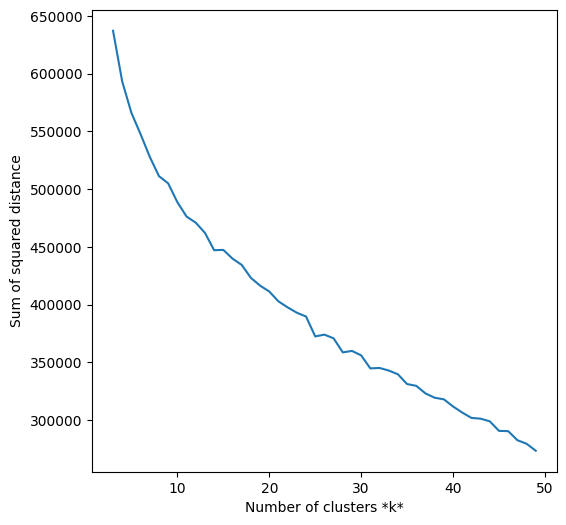

In [41]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Clipping cluster size from 41 to 30


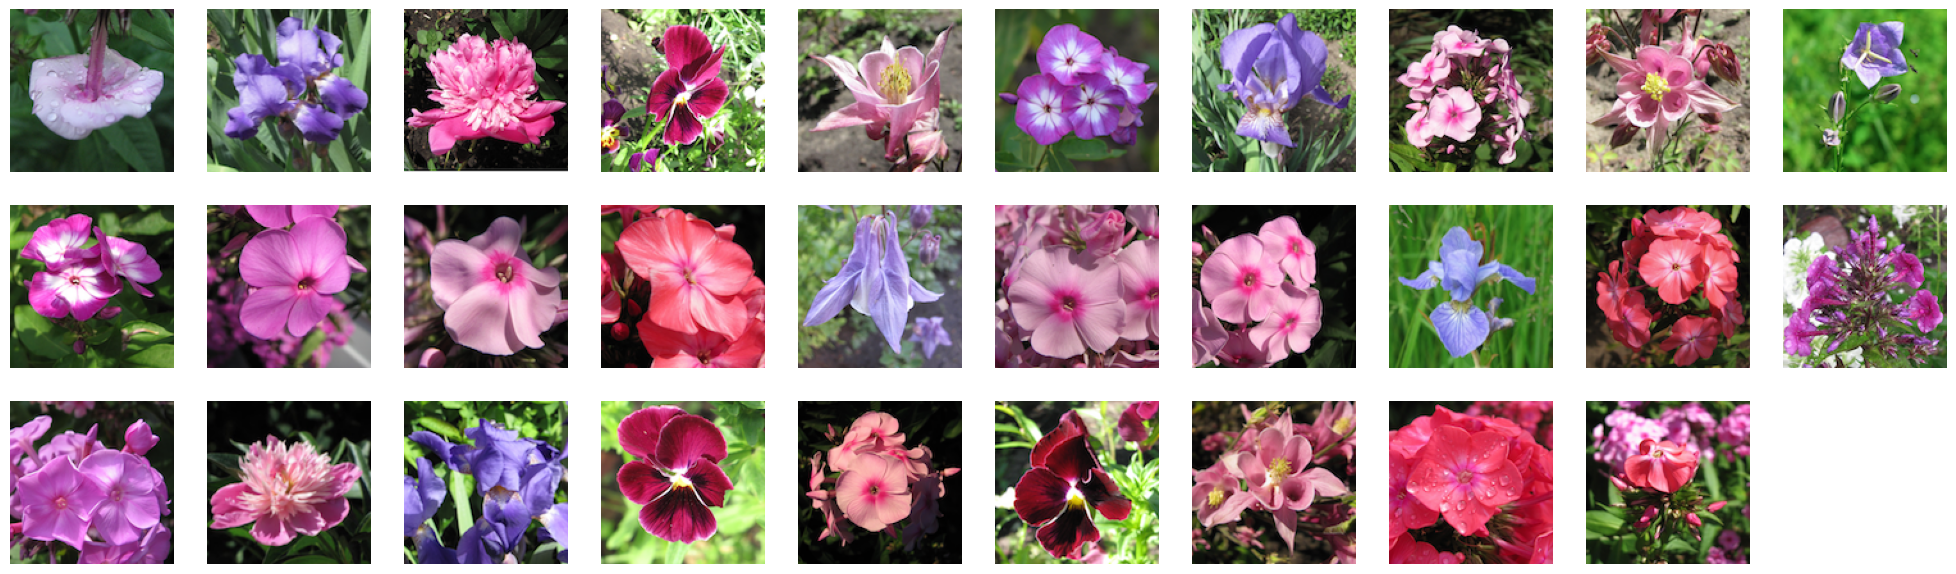

In [49]:
view_cluster(4)

# Trying this model with our sample images

In [53]:
path = r"data/images_for_mode_test"
# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            images.append(file.name)

In [58]:
data = {}
p = r"data/images_for_mode_test/features"

# lop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    feat = extract_features(f'data/images_for_mode_test/{image}',model)
    data[image] = feat

1/1 [==============================] - 0s 355ms/step


In [62]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

In [63]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [64]:
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

/Users/eric/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
groups

{1: ['3236.jpg',
  '11376.jpg',
  '5457.jpg',
  '5331.jpg',
  '5468.jpg',
  '9744.jpg',
  '7621.jpg',
  '4263.jpg',
  '3242.jpg',
  '5425.jpg',
  '3509.jpg',
  '1120.jpg',
  '1094.jpg',
  '2769.jpg',
  '9841.jpg',
  '3438.jpg',
  '1374.jpg'],
 3: ['3746.jpg',
  '1596.jpg',
  '7453.jpg',
  '2677.jpg',
  '5722.jpg',
  '12784.jpg',
  '2782.jpg',
  '939.jpg',
  '13040.jpg',
  '10830.jpg',
  '11086.jpg',
  '12061.jpg',
  '4967.jpg',
  '7712.jpg',
  '5924.jpg'],
 9: ['943.jpg'],
 8: ['13748.jpg',
  '9008.jpg',
  '9351.jpg',
  '320.jpg',
  '2154.jpg',
  '12638.jpg',
  '4133.jpg',
  '8585.jpg',
  '8543.jpg'],
 4: ['7865.jpg',
  '8121.jpg',
  '8481.jpg',
  '6232.jpg',
  '7271.jpg',
  '6751.jpg',
  '12459.jpg',
  '6551.jpg'],
 2: ['5732.jpg',
  '10079.jpg',
  '2663.jpg',
  '3269.jpg',
  '10949.jpg',
  '7556.jpg',
  '12157.jpg',
  '1057.jpg',
  '7238.jpg',
  '6042.jpg',
  '12014.jpg',
  '6569.jpg',
  '12717.jpg',
  '11153.jpg',
  '7101.jpg'],
 6: ['12279.jpg',
  '6006.jpg',
  '10131.jpg',
  '1295

In [72]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(f'data/images_for_mode_test/{file}')
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [2]:
groups[4]

NameError: name 'groups' is not defined

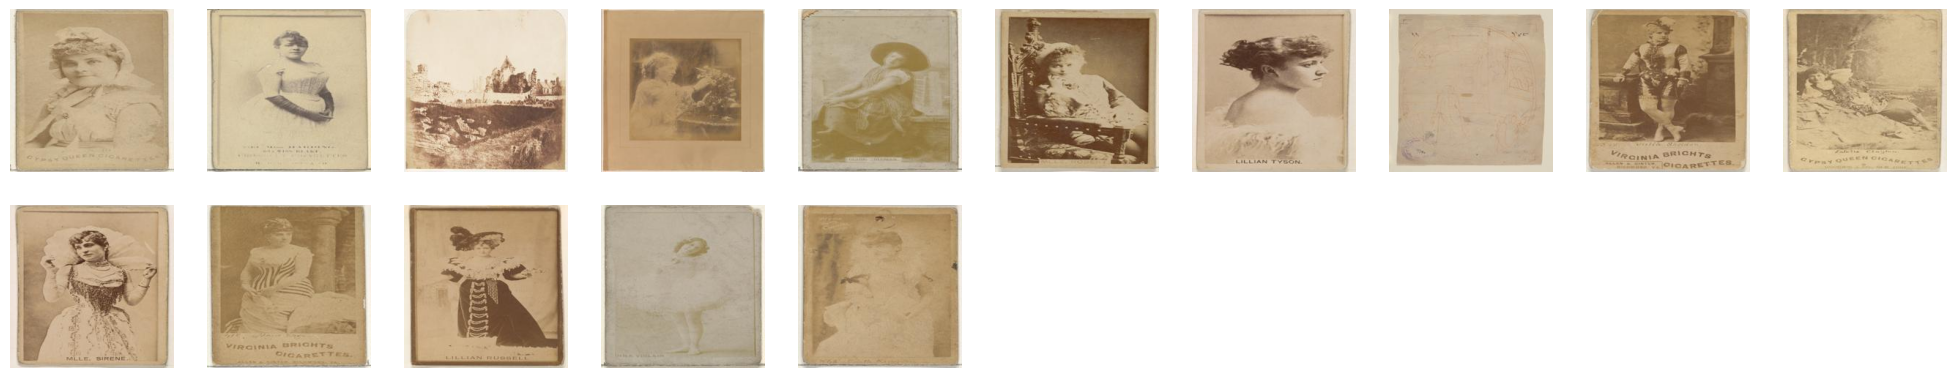

In [75]:
view_cluster(2)

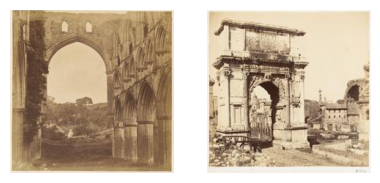

In [76]:
view_cluster(5)

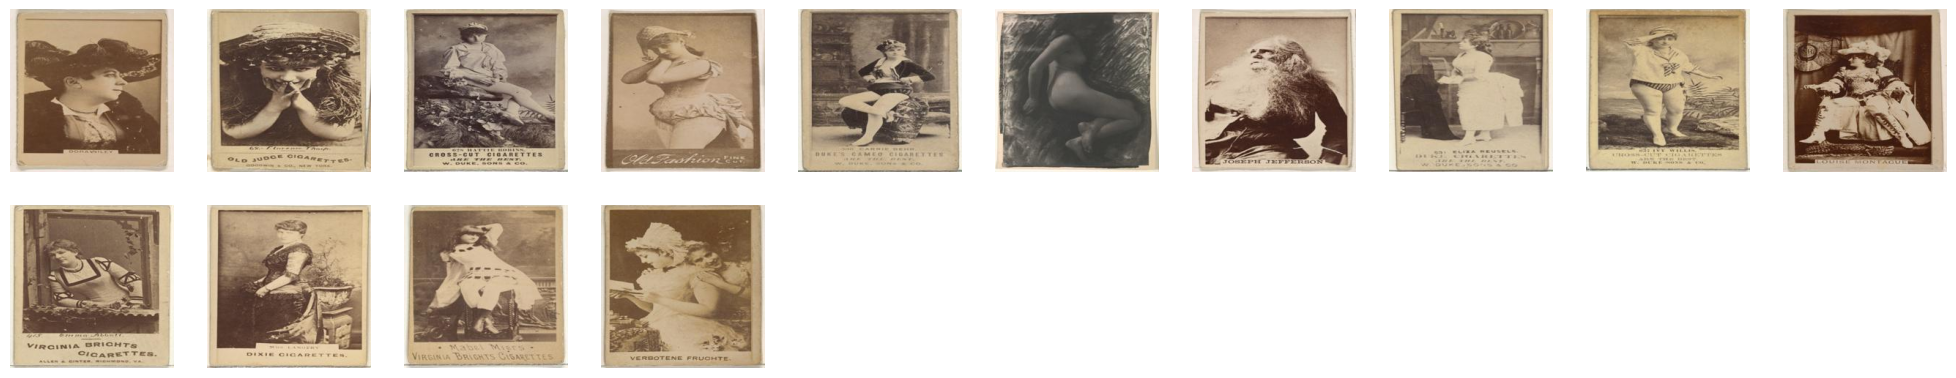

In [77]:
view_cluster(6)

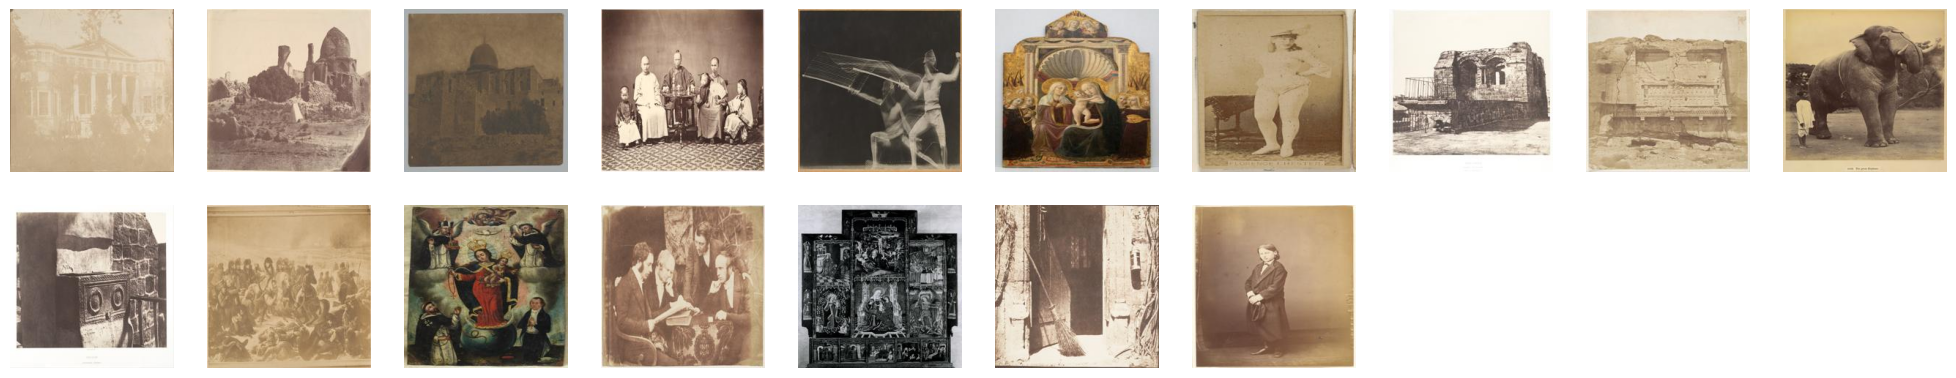

In [78]:
view_cluster(1)

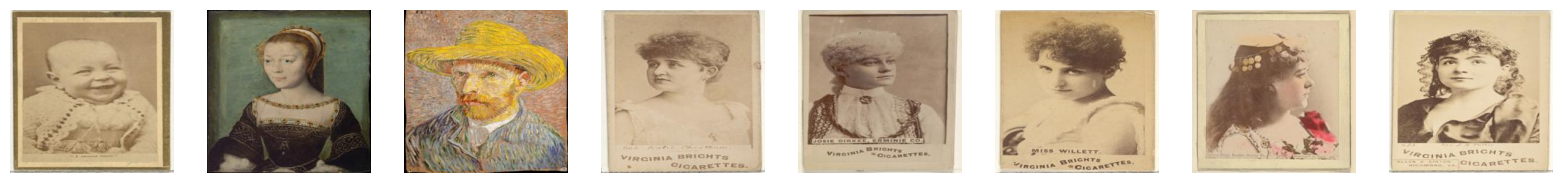

In [79]:
view_cluster(4)